<a href="https://colab.research.google.com/github/NoorieSaddie/IDS/blob/main/Drone_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [ ]:
!pip install mapclassify

In [47]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
import io

In [57]:
from google.colab import files
 
 
uploaded = files.upload()

Saving DroneAttack.csv to DroneAttack (3).csv


In [58]:

 
df = pd.read_csv(io.BytesIO(uploaded['DroneAttack.csv']))



In [62]:
pakistan_map = folium.Map(location = [30.37,69.34],zoom_start=8,tiles='OpenStreetMap')
#dronesmap = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x=df.geo_lon, y=df.geo_lat))

In [64]:
#calculate total number of deaths using a loop
t = 0
for c in df['deaths']:
  t = int(c)+int(t)
  

In [65]:
#mark circles on the map and displa the map

for latitude,longitude,date,pres,City,region,deaths in zip(list(df['latitude']),list(df['longitude']),list(df['date']),list(df['president_name']),list(df['City']),list(df['region']),list(df['deaths'])):
    folium.CircleMarker(location = [latitude,longitude],
                       radius = (deaths/t)*100,
                       color = 'red',
                       fill = False,
                       fill_color = 'blue').add_to(pakistan_map)

    xyz = '<strong>City:  ' + City + '</strong><br>'+ 'Region: ' + region + '<br>'  + 'Date: ' + str(date) + '<br>' + 'Deaths: '+ str(deaths) + '<br>' + 'President who ordered strikes: ' + pres 
    iframe = folium.IFrame(xyz, width=200, height=150)
    popupData = folium.Popup(iframe, max_width=500)
    folium.Marker(location = [latitude,longitude], popup=popupData).add_to(pakistan_map)
    

pakistan_map

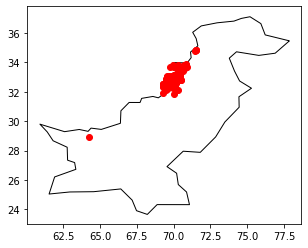

In [31]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.name == 'Pakistan'].plot(
color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
dronesmap.plot(ax=ax, color='red')

plt.show()